In [12]:
from typing import Iterator, Callable
from functools import reduce

import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt

from solved_helium_eq import symargs, solved, lambdified

In [2]:
the = pd.read_excel('the_helium.xlsx').set_index('photon (eV)')
the['inten_ratio'] = the['inten_2w (W/cm2)']**0.5/the['inten_w (W/cm2)']
for k, v in lambdified(**the[['coeff_s', 'coeff_p', 'coeff_d', 'eta_s', 'eta_p', 'eta_d']]).items():
    the[k] = v
the

,inten_w (W/cm2),inten_2w (W/cm2),coeff_s,coeff_p,coeff_d,eta_s,eta_p,eta_d,inten_ratio,beta1_amp,beta1_shift,beta2,beta3_amp,beta3_shift,beta4,beta1m3_amp,beta1m3_shift
photon (eV),,,,,,,,,,,,,,,,,
14.3,10000000000000,13600000000,0.003220,0.01140,-0.01090,5.36,2.26,0,1.166190e-08,1.252396,1.199396,1.292574,-2.228571,-2.26,1.178951,0.490704,3.10
15.0,10000000000000,13400000000,0.002530,0.01050,-0.01020,5.22,2.19,0,1.157584e-08,1.351011,1.224701,1.418408,-2.255443,-2.19,1.212245,0.416981,3.03
15.9,10000000000000,12500000000,0.001770,0.00944,-0.00928,5.07,2.12,0,1.118034e-08,1.440606,1.234198,1.544814,-2.282640,-2.12,1.241541,0.324509,2.95
16.0,10000000000000,12600000000,0.001690,0.00933,-0.00917,5.06,2.11,0,1.122497e-08,1.447017,1.237004,1.555316,-2.285303,-2.11,1.242737,0.313924,2.95
17.0,10000000000000,11800000000,0.000986,0.00830,-0.00824,4.94,2.06,0,1.086278e-08,1.505195,1.215183,1.644730,-2.307330,-2.06,1.267379,0.205789,2.88
18.0,10000000000000,11300000000,0.000339,0.00746,-0.00745,4.84,2.01,0,1.063015e-08,1.539554,1.182339,1.699980,-2.321388,-2.01,1.282664,0.078733,2.83
19.0,10000000000000,11100000000,-0.000392,0.00685,-0.00684,4.77,1.98,0,1.053565e-08,1.555511,1.097946,1.719252,-2.319983,-1.98,1.281734,-0.099101,2.79
19.1,10000000000000,11000000000,-0.000601,0.00676,-0.00673,4.76,1.98,0,1.048809e-08,1.558003,1.062659,1.718197,-2.314579,-1.98,1.274935,-0.154062,2.78
19.5,10000000000000,11400000000,-0.001020,0.00669,-0.00661,4.73,1.97,0,1.067708e-08,1.558268,1.001282,1.703686,-2.296607,-1.97,1.255480,-0.264149,2.76


In [3]:
exp = pd.read_excel('exp_gauss3.xlsx').set_index('dataset')
exp['photon (eV)'] = pd.Series({'good1': 15.9, 'good2': 14.3, 'good3': 19.1, 'good4': 15.9})
exp[['photon (eV)', *[k for k in exp if k.startswith('he_')]]]
exp

,he_beta1_amp_err,he_beta1_amp_value,he_beta1_freq_err,he_beta1_freq_value,he_beta1_offset_err,he_beta1_offset_value,he_beta1_shift_err,he_beta1_shift_value,he_beta1m3_amp_err,he_beta1m3_amp_value,...,ne_beta3_amp_value,ne_beta3_freq_err,ne_beta3_freq_value,ne_beta3_offset_err,ne_beta3_offset_value,ne_beta3_shift_err,ne_beta3_shift_value,ne_beta4_c_err,ne_beta4_c_value,photon (eV)
dataset,,,,,,,,,,,,,,,,,,,,,
good1,0.016970,0.534221,0,6.283185,0.012729,-0.011979,0.034757,0.236018,0.007805,0.113821,...,0.398722,0,6.283185,0.010687,-0.039238,0.037330,-0.182652,0.015320,0.432741,15.9
good2,0.005097,0.347818,0,6.283185,0.003756,-0.072793,0.015513,0.075804,0.008122,0.141339,...,0.197069,0,6.283185,0.004613,-0.012368,0.030744,-1.145020,0.003214,-0.030674,14.3
good3,0.004871,0.496982,0,6.283185,0.003367,-0.040736,0.009357,5.368111,0.003144,0.029859,...,0.267384,0,6.283185,0.002348,-0.036890,0.012146,4.939388,0.003633,0.024581,19.1
good4,0.012234,0.281430,0,6.283185,0.008562,-0.088810,0.042583,4.612789,0.003706,0.056858,...,0.233538,0,6.283185,0.006152,-0.024713,0.037645,4.182441,0.005237,0.095546,15.9


In [41]:
print(sp.latex(solved['beta3_amp']))
print(sp.latex(solved['beta1m3_amp']))

\frac{6 \sqrt{15} coeff_{d} coeff_{p}}{5 \left(coeff_{d}^{2} + coeff_{p}^{2} + coeff_{s}^{2}\right)}
\frac{2 \sqrt{3} coeff_{p} coeff_{s}}{coeff_{d}^{2} + coeff_{p}^{2} + coeff_{s}^{2}}


In [5]:
def solve_ratio_eq(beta_amp: sp.Expr) -> Callable:
    amp, r = sp.symbols('amp r', real=True)
    expr = beta_amp.subs(symargs['coeff_p'], symargs['coeff_p']*r)
    ratios = sp.solve(expr - amp, r)
    diffs = [r.diff(amp) for r in ratios]
    args = [amp, symargs['coeff_s'], symargs['coeff_p'], symargs['coeff_d']]
    lambdified_ratios = sp.lambdify(args, ratios, 'numpy')
    lambdified_diffs = sp.lambdify(args, diffs, 'numpy')

    def ratios(amp: float, amp_err: float, amp_sign: float = None, **ref):
        if amp_sign is not None:
            amp = np.abs(amp) * np.sign(amp_sign)
        ratios = lambdified_ratios(amp=amp, **ref)
        diffs = lambdified_diffs(amp=amp, **ref)
        for r, d in zip(ratios, diffs):
            yield {
                'ratio': r,
                'ratio_err': amp_err * np.abs(d),
                'coeff_s': ref['coeff_s'],
                'coeff_p': ref['coeff_p'] * r,
                'coeff_d': ref['coeff_d'],
            }
    return ratios


ratios = {k: solve_ratio_eq(solved[k]) for k in ('beta3_amp', 'beta1m3_amp')}

In [6]:
est = pd.DataFrame([
    {'dataset': d,
     'eq': f'{k}_{i}',
     'photon (eV)': ph,
     'inten_ratio': ret['ratio'] * the.loc[ph]['inten_ratio'],
     'inten_ratio_err': ret['ratio_err'] * the.loc[ph]['inten_ratio'],
     **the.loc[ph][['eta_s', 'eta_p', 'eta_d']],
     **ret}
    for k, ratio in ratios.items()
    for d, ph, amp, err in exp[['photon (eV)', f'he_{k}_value', f'he_{k}_err']].itertuples()
    for i, ret in enumerate(ratio(amp, err, amp_sign=the.loc[ph][k],
                                  **the.loc[ph][['coeff_s', 'coeff_p', 'coeff_d']]))
])
for k, v in lambdified(**est[['coeff_s', 'coeff_p', 'coeff_d', 'eta_s', 'eta_p', 'eta_d']]).items():
    est[k] = v
est

,coeff_d,coeff_p,coeff_s,dataset,eq,eta_d,eta_p,eta_s,inten_ratio,inten_ratio_err,...,ratio,ratio_err,beta1_amp,beta1_shift,beta2,beta3_amp,beta3_shift,beta4,beta1m3_amp,beta1m3_shift
0,-0.00928,0.051515,0.001770,good1,beta3_amp_0,0.0,2.12,5.07,6.101256e-08,1.984435e-09,...,5.457129,0.177493,0.511188,1.234198,1.970402,-0.809978,-2.12,0.080730,0.115150,2.95
1,-0.00928,0.001733,0.001770,good1,beta3_amp_1,0.0,2.12,5.07,2.051924e-09,6.673889e-11,...,0.183530,0.005969,0.511188,1.234198,1.119928,-0.809978,-2.12,2.400437,0.115150,2.95
2,-0.01090,0.086795,0.003220,good2,beta3_amp_0,0.0,2.26,5.36,8.878876e-08,2.161659e-09,...,7.613573,0.185361,0.322471,1.199396,1.976076,-0.573820,-2.26,0.039871,0.126348,3.10
3,-0.01090,0.001488,0.003220,good2,beta3_amp_1,0.0,2.26,5.36,1.522513e-09,3.706724e-11,...,0.130554,0.003178,0.322471,1.199396,0.604791,-0.573820,-2.26,2.325164,0.126348,3.10
4,-0.00673,0.042171,-0.000601,good3,beta3_amp_0,0.0,1.98,4.76,6.542771e-08,7.633039e-10,...,6.238288,0.072778,0.486763,1.062659,1.985887,-0.723138,-1.98,0.063852,-0.048133,2.78
5,-0.00673,0.001083,-0.000601,good3,beta3_amp_1,0.0,1.98,4.76,1.679644e-09,1.959535e-11,...,0.160148,0.001868,0.486763,1.062659,1.450239,-0.723138,-1.98,2.487233,-0.048133,2.78
6,-0.00928,0.097369,0.001770,good4,beta3_amp_0,0.0,2.12,5.07,1.153193e-07,4.680413e-09,...,10.314474,0.418629,0.276945,1.234198,1.991516,-0.438820,-2.12,0.023140,0.062384,2.95
7,-0.00928,0.000917,0.001770,good4,beta3_amp_1,0.0,2.12,5.07,1.085622e-09,4.406163e-11,...,0.097101,0.003941,0.276945,1.234198,1.098814,-0.438820,-2.12,2.458026,0.062384,2.95
8,-0.00928,0.001711,0.001770,good1,beta1m3_amp_0,0.0,2.12,5.07,2.026638e-09,1.483963e-10,...,0.181268,0.013273,0.505291,1.234198,1.119226,-0.800634,-2.12,2.402351,0.113821,2.95
9,-0.00928,0.052158,0.001770,good1,beta1m3_amp_1,0.0,2.12,5.07,6.177382e-08,4.523259e-09,...,5.525218,0.404573,0.505291,1.234198,1.971104,-0.800634,-2.12,0.078815,0.113821,2.95


In [42]:
est.sort_values(['dataset', 'eq'])[[
    'dataset', 'eq', 'photon (eV)',  'inten_ratio', 'inten_ratio_err',
    'beta1_amp', 'beta2', 'beta3_amp', 'beta4', 'beta1m3_amp',
]]

,dataset,eq,photon (eV),inten_ratio,inten_ratio_err,beta1_amp,beta2,beta3_amp,beta4,beta1m3_amp
8,good1,beta1m3_amp_0,15.9,2.026638e-09,1.483963e-10,0.505291,1.119226,-0.800634,2.402351,0.113821
9,good1,beta1m3_amp_1,15.9,6.177382e-08,4.523259e-09,0.505291,1.971104,-0.800634,0.078815,0.113821
0,good1,beta3_amp_0,15.9,6.101256e-08,1.984435e-09,0.511188,1.970402,-0.809978,0.080730,0.115150
1,good1,beta3_amp_1,15.9,2.051924e-09,6.673889e-11,0.511188,1.119928,-0.809978,2.400437,0.115150
10,good2,beta1m3_amp_0,14.3,1.710695e-09,1.026596e-10,0.360732,0.610938,-0.641904,2.314921,0.141339
11,good2,beta1m3_amp_1,14.3,7.902173e-08,4.742131e-09,0.360732,1.969929,-0.641904,0.050114,0.141339
2,good2,beta3_amp_0,14.3,8.878876e-08,2.161659e-09,0.322471,1.976076,-0.573820,0.039871,0.126348
3,good2,beta3_amp_1,14.3,1.522513e-09,3.706724e-11,0.322471,0.604791,-0.573820,2.325164,0.126348
12,good3,beta1m3_amp_0,19.1,1.071519e-07,1.150039e-08,0.301961,1.994654,-0.448595,0.024186,-0.029859
13,good3,beta1m3_amp_1,19.1,1.025602e-09,1.100757e-10,0.301961,1.441472,-0.448595,2.526898,-0.029859


In [8]:
exp[[k for k in exp.keys()
     if k.startswith('he_') and (k.endswith('_amp_value') or k.endswith('_c_value'))]]

,he_beta1_amp_value,he_beta1m3_amp_value,he_beta2_c_value,he_beta3_amp_value,he_beta4_c_value
dataset,,,,,
good1,0.534221,0.113821,1.630931,0.809978,1.028259
good2,0.347818,0.141339,0.855773,0.573820,0.935211
good3,0.496982,0.029859,1.783591,0.723138,1.010375
good4,0.281430,0.056858,1.691176,0.438820,0.411959


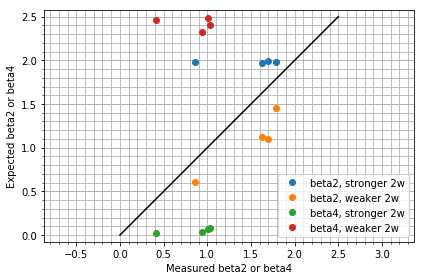

In [40]:
sliced0 = est[est['eq']=='beta3_amp_0'].set_index('dataset')
sliced1 = est[est['eq']=='beta3_amp_1'].set_index('dataset')
x = np.linspace(0, 2.5)

plt.figure()
plt.xlabel('Measured beta2 or beta4')
plt.ylabel('Expected beta2 or beta4')
plt.plot(exp['he_beta2_c_value'], sliced0['beta2'], 'o', label='beta2, stronger 2w')
plt.plot(exp['he_beta2_c_value'], sliced1['beta2'], 'o', label='beta2, weaker 2w')
plt.plot(exp['he_beta4_c_value'], sliced0['beta4'], 'o', label='beta4, stronger 2w')
plt.plot(exp['he_beta4_c_value'], sliced1['beta4'], 'o', label='beta4, weaker 2w')
plt.plot(x, x, 'k')
plt.minorticks_on()
plt.grid(True, which='both')
plt.axis('equal')
plt.legend()

plt.tight_layout()
plt.savefig('measured vs expected.png')
plt.show()